#### **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS** 

#### **IMPORT LIBRARIES**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **IMPORT RAW DATA**

In [13]:
df = pd.read_csv("C:/Users/Rohit Janghu/Desktop/blin.csv")

#### **SAMPLE DATA**

In [17]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


#### **SIZE OF DATA**

In [18]:
df.shape

(8523, 12)

In [19]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


#### **FIELD INFO**

In [20]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### **CHECKING DATA TYPES**

In [21]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### **DATA CLEANING**

In [23]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg' : 'Regular'
                                                        })

In [24]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#### **BUSINESS REQUIREMENT**

#### **KPI'S REQUIREMENT**

In [38]:
#Total sales
total_sales = df['Sales'].sum()
print(f"total sales: ${total_sales:,.0f}")

#Average Sales
avg_sales = df['Sales'].mean()
print(f"avg sales; ${avg_sales:,.0f}")

#No Of Item sold
no_of_item_sold = df['Sales'].count()
print(f"no of item: {no_of_item_sold:,.0f}")

#Average Rating
avg_rating = df['Rating'].mean()
print(f"avg rating: {avg_rating:,.1f}")

total sales: $1,201,681
avg sales; $141
no of item: 8,523
avg rating: 4.0


### **CHARTS REQUIREMENT**

#### **Total Sales By Content**

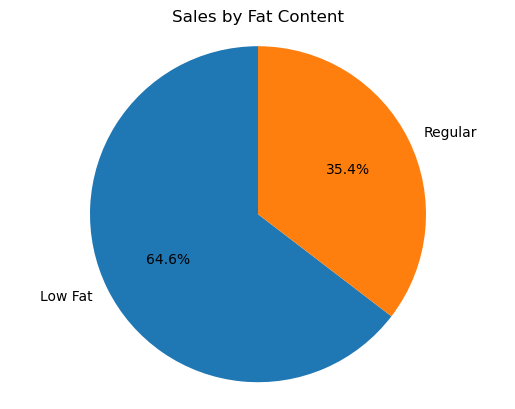

In [43]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index,
        autopct = '%.1f%%',startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### **total sales by item type**

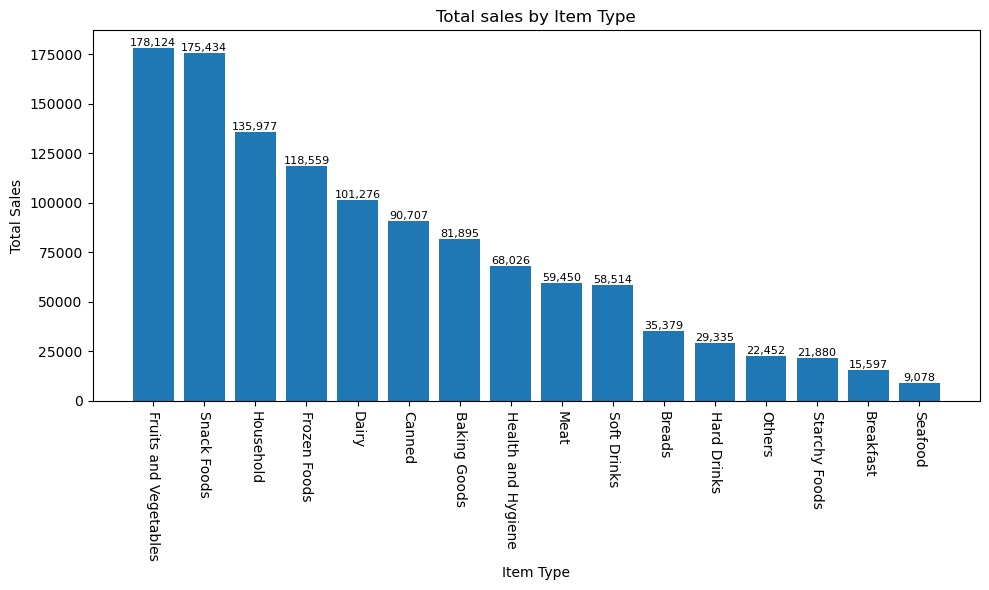

In [50]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending= False)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation= -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
    f'{bar.get_height():,.0f}', ha='center', va = 'bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### **fat content by outlet for total sales**


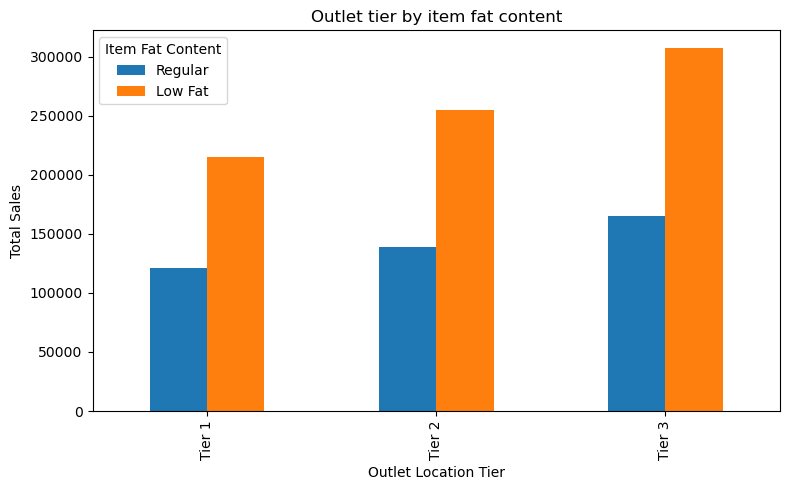

In [65]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
ax = grouped.plot(kind = 'bar',figsize=(8,5),title = 'Outlet tier by item fat content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

#### **TOTAL SALES BY OUTLET ESTABLISHMENT**

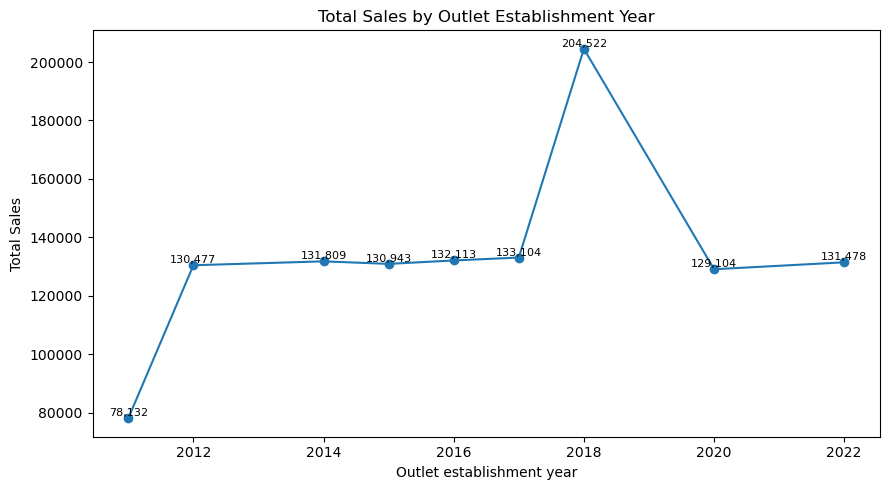

In [68]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet establishment year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')


for x,y in zip(sales_by_year.index,sales_by_year.values):
  plt.text(x,y,f'{y:,.0f}',ha ='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

#### **Sales By Outlet Size**

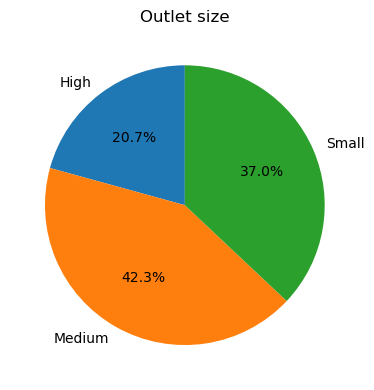

In [70]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels =sales_by_size.index, autopct='%1.1f%%', startangle = 90)
plt.title('Outlet size')
plt.tight_layout()
plt.show()